In [1]:
!pip install wordcloud
!pip install arabic_reshaper
!pip install python-bidi

In [2]:
import re
import pandas as pd
import re
import codecs
import os
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
import nltk

In [3]:
from nltk.corpus import stopwords
#print(stopwords.fileids())
import json

english_stopwords = list()
arabic_stopwords = list()
persian_stopwords = list()

with open('stopwords/english.json', encoding="utf-8") as f:
    english_data = json.load(f)
    english_stopwords.append(english_data)
    
english_stopwords = english_stopwords[0]

with open('stopwords/arabic.json', encoding="utf-8") as f:
    arabic_data = json.load(f)
    arabic_stopwords.append(arabic_data)
    
arabic_stopwords = arabic_stopwords[0]

with open('stopwords/persian.json', encoding="utf-8") as f:
    persian_data = json.load(f)
    persian_stopwords.append(persian_data)
    
persian_stopwords = persian_stopwords[0]

arabic.txt


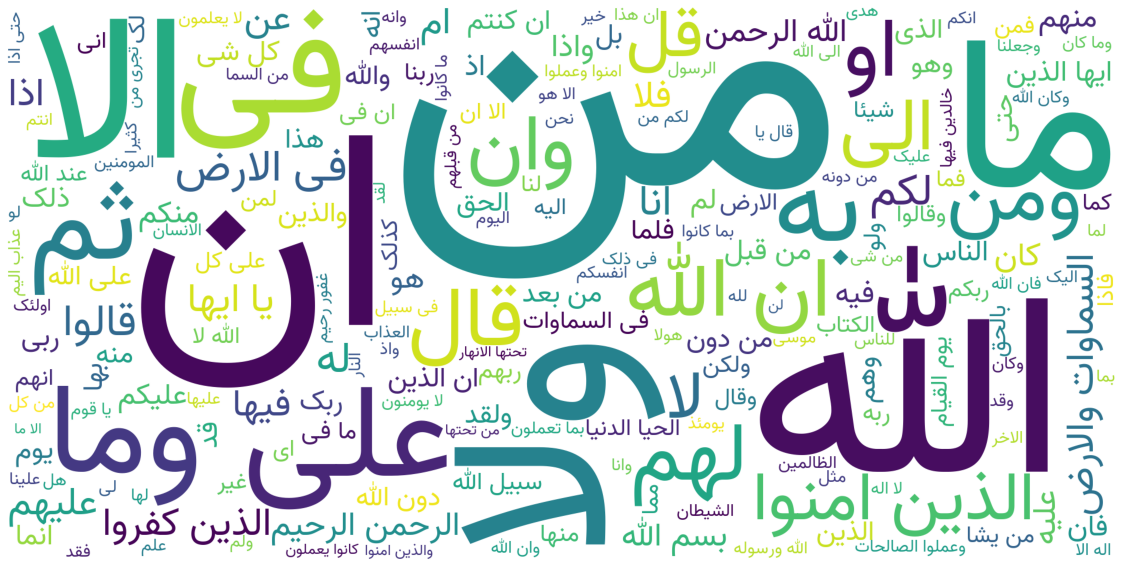

In [5]:
thisdir = os.getcwd()

for r, d, f in os.walk("data"):
    for file in f:
        if file.endswith(".txt"):
            data = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()
            language_file = file.split("_")
            
            if language_file[0] == 'english.txt':
                continue
                file_input = codecs.open(os.path.join(data, "data/"+file), 'r')
                quran_text = file_input.read()
                quran_text = quran_text.replace("\n", " ")
                quran_text = quran_text.lower()
                data_stopwords = english_stopwords
                
                quran_string = quran_text.split(" ")
                for qst in range(len(quran_string)):
                    for stp in range(len(data_stopwords)):
                        if(quran_string[qst] == data_stopwords[stp]):
                            quran_string[qst] = " "
                quran_text = ' '.join(quran_string)
                
                quran_text = get_display(quran_text)  
                wc = WordCloud(background_color="white",font_path='font/calibri.ttf', width=2000, height=1000)
            elif language_file[0] == 'persian.txt' or language_file[0] == 'arabic.txt':
                file_input = codecs.open(os.path.join(data, "data/"+file), 'r', 'utf-8')
                quran_text = arabic_reshaper.reshape(file_input.read())
                
                if (language_file[0] == 'persian.txt'):
                    data_stopwords = persian_stopwords
                    continue
                elif (language_file[0] == 'arabic.txt'):
                    data_stopwords = arabic_stopwords
                else:
                    data_stopwords = list()
                    
                quran_string = nltk.word_tokenize(quran_text)
                for qst in range(len(quran_string)):
                    for stp in range(len(data_stopwords)):
                        if(quran_string[qst] == str(data_stopwords[stp])):
                            quran_string[qst] = " "
                quran_text = ' '.join(quran_string)
                
                quran_text = get_display(quran_text)                
                wc = WordCloud(background_color="white",font_path='font/vazir.ttf', width=2000, height=1000)
            else:
                continue

            wc.generate(quran_text)
            print(file)
            plt.figure(figsize=(20,20))
            plt.axis("off")
            plt.imshow(wc)
            plt.savefig("wordcloud/stopword_"+file.replace(".txt", ".png"))

            plt.show()

In [6]:
file_input = codecs.open(os.path.join(data, "data/persian.txt"), 'r', 'utf-8')
quran_text = arabic_reshaper.reshape(file_input.read())
data_stopwords = persian_stopwords

In [9]:
quran_string = nltk.word_tokenize(quran_text)
print(quran_string[2])
"""
for qst in range(len(quran_string)):
    for stp in range(len(data_stopwords)):
        if(quran_string[qst] == str(data_stopwords[stp])):
            print(1)

#quran_text = ' '.join(quran_string)

#print(quran_string)"""

ﺧﺪﺍﻭﻧﺪ


"\nfor qst in range(len(quran_string)):\n    for stp in range(len(data_stopwords)):\n        if(quran_string[qst] == str(data_stopwords[stp])):\n            print(1)\n\n#quran_text = ' '.join(quran_string)\n\n#print(quran_string)"

In [52]:
import difflib
def similarity(left: str = "", right: str = "") -> float:

    seq = difflib.SequenceMatcher(None, left, right)
    return seq.ratio()

In [61]:
print(similarity(str(quran_string[0]), "به"))

0.0


In [57]:
quran_string[0]

'ﺑﻪ'

In [65]:
print(ord("ب"))
print(ord("ه"))

print(ord("ﺑ"))
print(ord("ﻪ"))

1576
1607
65169
65258


In [19]:
data_stopwords

['آباد',
 'آره',
 'آری',
 'آمد',
 'آمده',
 'آن',
 'آنان',
 'آنجا',
 'آنكه',
 'آنها',
 'آنچه',
 'آورد',
 'آورده',
 'آيد',
 'آیا',
 'اثرِ',
 'از',
 'است',
 'استفاده',
 'اش',
 'اكنون',
 'البته',
 'البتّه',
 'ام',
 'اما',
 'امروز',
 'امسال',
 'اند',
 'انکه',
 'او',
 'اول',
 'اي',
 'ايشان',
 'ايم',
 'اين',
 'اينكه',
 'اگر',
 'با',
 'بار',
 'بارة',
 'باره',
 'باشد',
 'باشند',
 'باشيم',
 'بالا',
 'بالایِ',
 'بايد',
 'بدون',
 'بر',
 'برابرِ',
 'براساس',
 'براي',
 'برایِ',
 'برخوردار',
 'برخي',
 'برداري',
 'بروز',
 'بسيار',
 'بسياري',
 'بعد',
 'بعری',
 'بعضي',
 'بلكه',
 'بله',
 'بلکه',
 'بلی',
 'بنابراين',
 'بندي',
 'به',
 'بهترين',
 'بود',
 'بودن',
 'بودند',
 'بوده',
 'بي',
 'بيست',
 'بيش',
 'بيشتر',
 'بيشتري',
 'بين',
 'بی',
 'بیرونِ',
 'تا',
 'تازه',
 'تاكنون',
 'تان',
 'تحت',
 'تر',
 'ترين',
 'تمام',
 'تمامي',
 'تنها',
 'تواند',
 'توانند',
 'توسط',
 'تولِ',
 'تویِ',
 'جا',
 'جاي',
 'جايي',
 'جدا',
 'جديد',
 'جريان',
 'جز',
 'جلوگيري',
 'جلویِ',
 'حتي',
 'حدودِ',
 'حق',
 'خارجِ',
 'خدمات',
 